In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from tqdm import tqdm

In [53]:
con1 = pd.read_csv('conversion_rate2.csv',)
con2 = pd.read_csv('conversion_rate1.csv')
data_t = pd.read_csv('data_t.csv')
data_s = pd.read_csv('data_s.csv')
data_t.rename(columns={'utm_source':'Source'},inplace = True)
data_s.rename(columns={'utm_source':'Source'},inplace = True)

In [54]:
#This is travel data. This data is grouped source wise
data_t.head()

,Source,crn,total_atm_count_dom,total_atm_count_int,total_atm_spends_dom,total_atm_spends_int,total_pos_count_dom,total_pos_count_int,total_pos_spends_dom,total_pos_spends_int,total_ecom_count_dom,total_ecom_count_int,total_ecom_spends_dom,total_ecom_spends_int,trips
0,ADYLL_77,1,0,0,0.0,0.0,0,11,0.00,52829.48,0,0,0.00,0.00,2.0
1,Airborne_Visa,4,0,0,0.0,0.0,18,76,33679.96,302796.66,18,6,17341.88,24135.33,4.0
2,AkbarTravels,56,0,0,0.0,0.0,150,881,246616.72,2313090.24,128,200,572735.72,1464652.06,87.0
3,CX,16,0,0,0.0,0.0,22,57,12682.67,157233.90,43,2,15365.48,8891.89,12.0
4,Facebook,919,0,0,0.0,0.0,3706,10441,6134429.27,32425731.85,3114,4806,4953556.72,25884790.83,896.0


In [55]:
#This is student dta This is also grouped source wise
data_s.head()

,Source,crn,total_atm_count_dom,total_atm_count_int,total_atm_spends_dom,total_atm_spends_int,total_pos_count_dom,total_pos_count_int,total_pos_spends_dom,total_pos_spends_int,total_ecom_count_dom,total_ecom_count_int,total_ecom_spends_dom,total_ecom_spends_int,trips
0,AkbarTravels,7,0,0,0.0,0.0,3,82,3609.28,157119.01,3,75,2176.00,576254.14,12.0
1,AmberStudents,1,0,0,0.0,0.0,0,18,0.00,100521.22,0,10,0.00,855692.41,4.0
2,CX,4,0,0,0.0,0.0,4,0,512.57,0.00,35,94,37021.56,50420.21,5.0
3,Facebook,227,0,0,0.0,0.0,440,2397,1018883.45,5217312.04,803,969,1435654.23,8624007.10,114.0
4,Gyandhan,15,0,0,0.0,0.0,8,81,3126.92,126813.98,10,75,9949.70,378555.59,15.0


In [56]:
data_s = data_s[['Source', 'crn','total_atm_spends_dom', 'total_atm_spends_int','total_pos_spends_dom',
                 'total_pos_spends_int', 'total_ecom_spends_dom','total_ecom_spends_int', 'trips']]
data_t = data_t[['Source', 'crn','total_atm_spends_dom', 'total_atm_spends_int','total_pos_spends_dom',
                 'total_pos_spends_int', 'total_ecom_spends_dom','total_ecom_spends_int', 'trips']]

In [57]:
con1.fillna(0,inplace=True)
con1.head(20)

,Source,Total Leads,Total Enrolled,Conversion Rate
0,aaeri,3,0,0.00%
1,Adyl,1,0,0.00%
2,ADYLL_77,40,4,10.00%
3,ADYLL_83,1,0,0.00%
4,affiliate,2255,413,18.31%
5,Airborne_Visa,17,1,5.88%
6,AkbarTravels,595,141,23.70%
7,AmberStudents,2,0,0.00%
8,bing,13,0,0.00%
9,Blink Visa,1,0,0.00%


In [58]:
con2.replace('-','0%',inplace=True)
con2.head()

,Source,Total leads,Unique leads,Total enrolled,Conversion Rate,Active Enrolled,Active enrolled/total leads
0,LMS Data,144062,126836,39070,30.80%,36303,25.20%
1,Ixigo,4134,3596,0%,#VALUE!,0%,0%
2,Holiday IQ,2415,2406,25,1.04%,21,0.87%
3,Tripoto,1671,1665,64,3.84%,59,3.53%
4,Travel Triangle,9300,9239,1703,18.43%,1675,18.01%


In [59]:
con1['Conversion Rate'] =con1['Conversion Rate'].apply(lambda x: re.findall('\d+\.\d+',x)[0])


In [60]:
con2.drop(con2[con2['Source']=='Ixigo'].index,inplace=True)
con2.rename(columns={'Total enrolled/total leads':'Conversion Rate'},inplace = True)

con2['Conversion Rate'] =con2['Conversion Rate'].apply(lambda x: re.findall('\d+\.\d+',x)[0])

In [61]:
#Conversion Rate = Total Enrolled/Total Leads
con1.Source.unique()

array(['aaeri', 'Adyl', 'ADYLL_77', 'ADYLL_83', 'affiliate',
       'Airborne_Visa', 'AkbarTravels', 'AmberStudents', 'bing',
       'Blink Visa', 'bookrumz', 'CampusFrance', 'cardinfo.in', 'channel',
       'conversionx', 'CX', 'Direct/Others', 'email', 'Facebook',
       'France by French', 'google', 'Great Escape Acquisition',
       'Gyandhan', 'ICAI', 'Influencers', 'InhouseCallCenter',
       'Instagram', 'Instagram Page', 'Internal student database',
       'InternalLMSData', 'IVR', 'Ixigo', 'Jigserv', 'Jigserv_1Feb',
       'Jigserv_March', 'Jigserv_March_business', 'Jigserv_March_new',
       'Jigserv_March_solo', 'Jigserv_March_student', 'Kayak',
       'KKTravels', 'LEADDIGITAL', 'Magichotelbooking', 'mentorix',
       'native', 'Newfeatures', 'newsletter', 'Newsletter201',
       'nixtoursandtravels', 'niyo-app-red', 'niyo-benefits-app',
       'niyo-global-app', 'Quora', 'QuoraAds', 'referral', 'source',
       'Student Accquisition', 'TEST', 'test y', 'ThExTravel.com',
  

In [62]:

conf = pd.concat([con1[['Source','Conversion Rate']],con2[['Source','Conversion Rate']]])
conf.reset_index(inplace=True)

In [63]:
conf.drop('index',axis=1,inplace=True)

In [64]:
conf.drop(conf[conf['Source']=='TravelTriangle'].index  ,inplace=True)
conf.drop(conf[conf['Source']=='Mentorix'].index  ,inplace=True)

In [65]:
conf[conf['Source']=='Airborne_Visa']

,Source,Conversion Rate
5,Airborne_Visa,5.88


In [66]:
conf.columns

Index(['Source', 'Conversion Rate'], dtype='object')

In [67]:
conf.Source.unique()

array(['aaeri', 'Adyl', 'ADYLL_77', 'ADYLL_83', 'affiliate',
       'Airborne_Visa', 'AkbarTravels', 'AmberStudents', 'bing',
       'Blink Visa', 'bookrumz', 'CampusFrance', 'cardinfo.in', 'channel',
       'conversionx', 'CX', 'Direct/Others', 'email', 'Facebook',
       'France by French', 'google', 'Great Escape Acquisition',
       'Gyandhan', 'ICAI', 'Influencers', 'InhouseCallCenter',
       'Instagram', 'Instagram Page', 'Internal student database',
       'InternalLMSData', 'IVR', 'Ixigo', 'Jigserv', 'Jigserv_1Feb',
       'Jigserv_March', 'Jigserv_March_business', 'Jigserv_March_new',
       'Jigserv_March_solo', 'Jigserv_March_student', 'Kayak',
       'KKTravels', 'LEADDIGITAL', 'Magichotelbooking', 'mentorix',
       'native', 'Newfeatures', 'newsletter', 'Newsletter201',
       'nixtoursandtravels', 'niyo-app-red', 'niyo-benefits-app',
       'niyo-global-app', 'Quora', 'QuoraAds', 'referral', 'source',
       'Student Accquisition', 'TEST', 'test y', 'ThExTravel.com',
  

In [68]:
conf[conf['Source']=='Travel Triangle']
#conf[conf['Source']=='Travel Triangle']

,Source,Conversion Rate
77,Travel Triangle,18.43


In [90]:
conf

,Source,Conversion Rate
0,aaeri,0.00
1,adyl,0.00
2,adyll_77,10.00
3,adyll_83,0.00
4,affiliate,18.31
...,...,...
74,lmsdata,30.80
75,holidayiq,1.04
76,tripoto,3.84
77,traveltriangle,18.43


In [69]:
data_t.fillna(0,inplace=True)
data_s.fillna(0,inplace=True)
data_t

,Source,crn,total_atm_spends_dom,total_atm_spends_int,total_pos_spends_dom,total_pos_spends_int,total_ecom_spends_dom,total_ecom_spends_int,trips
0,ADYLL_77,1,0.0,0.0,0.00,5.282948e+04,0.00,0.000000e+00,2.0
1,Airborne_Visa,4,0.0,0.0,33679.96,3.027967e+05,17341.88,2.413533e+04,4.0
2,AkbarTravels,56,0.0,0.0,246616.72,2.313090e+06,572735.72,1.464652e+06,87.0
3,CX,16,0.0,0.0,12682.67,1.572339e+05,15365.48,8.891890e+03,12.0
4,Facebook,919,0.0,0.0,6134429.27,3.242573e+07,4953556.72,2.588479e+07,896.0
5,Gyandhan,11,0.0,0.0,2547.00,5.207732e+05,59292.64,1.147373e+06,10.0
6,ICAI,1,0.0,0.0,0.00,1.027596e+04,0.00,1.072160e+05,2.0
7,IVR,54,0.0,0.0,284351.18,2.022546e+06,289014.59,1.158601e+06,38.0
8,Influencers,9,0.0,0.0,15384.15,4.711174e+05,41287.02,1.717122e+05,11.0
9,InhouseCallCenter,32,0.0,0.0,141366.94,1.428062e+06,247253.57,2.046094e+06,44.0


In [70]:
conf['Source']=conf['Source'].str.lower()
conf['Source']= conf['Source'].apply(lambda x: x.replace(' ',''))

data_t['Source']=data_t['Source'].str.lower()
data_t['Source']= data_t['Source'].apply(lambda x: x.replace(' ',''))

data_s['Source']=data_s['Source'].str.lower()
data_s['Source']= data_s['Source'].apply(lambda x: x.replace(' ',''))

data_t = pd.merge(data_t,conf[['Source','Conversion Rate']],how='left',on='Source')
data_s=pd.merge(data_s,conf[['Source','Conversion Rate']],how='left',on='Source')

In [71]:
data_t

,Source,crn,total_atm_spends_dom,total_atm_spends_int,total_pos_spends_dom,total_pos_spends_int,total_ecom_spends_dom,total_ecom_spends_int,trips,Conversion Rate
0,adyll_77,1,0.0,0.0,0.00,5.282948e+04,0.00,0.000000e+00,2.0,10.00
1,airborne_visa,4,0.0,0.0,33679.96,3.027967e+05,17341.88,2.413533e+04,4.0,5.88
2,akbartravels,56,0.0,0.0,246616.72,2.313090e+06,572735.72,1.464652e+06,87.0,23.70
3,cx,16,0.0,0.0,12682.67,1.572339e+05,15365.48,8.891890e+03,12.0,20.02
4,facebook,919,0.0,0.0,6134429.27,3.242573e+07,4953556.72,2.588479e+07,896.0,28.63
5,gyandhan,11,0.0,0.0,2547.00,5.207732e+05,59292.64,1.147373e+06,10.0,26.67
6,icai,1,0.0,0.0,0.00,1.027596e+04,0.00,1.072160e+05,2.0,0.00
7,ivr,54,0.0,0.0,284351.18,2.022546e+06,289014.59,1.158601e+06,38.0,34.59
8,influencers,9,0.0,0.0,15384.15,4.711174e+05,41287.02,1.717122e+05,11.0,21.05
9,inhousecallcenter,32,0.0,0.0,141366.94,1.428062e+06,247253.57,2.046094e+06,44.0,15.31


In [72]:
data_s

,Source,crn,total_atm_spends_dom,total_atm_spends_int,total_pos_spends_dom,total_pos_spends_int,total_ecom_spends_dom,total_ecom_spends_int,trips,Conversion Rate
0,akbartravels,7,0.0,0.0,3609.28,157119.01,2176.00,5.762541e+05,12.0,23.70
1,amberstudents,1,0.0,0.0,0.00,100521.22,0.00,8.556924e+05,4.0,0.00
2,cx,4,0.0,0.0,512.57,0.00,37021.56,5.042021e+04,5.0,20.02
3,facebook,227,0.0,0.0,1018883.45,5217312.04,1435654.23,8.624007e+06,114.0,28.63
4,gyandhan,15,0.0,0.0,3126.92,126813.98,9949.70,3.785556e+05,15.0,26.67
5,ivr,23,0.0,0.0,66191.92,2086288.71,395223.89,9.873455e+05,31.0,34.59
6,inhousecallcenter,26,0.0,0.0,54490.61,1769068.30,245479.50,5.855221e+06,82.0,15.31
7,instagram,1,0.0,0.0,21512.54,1884.28,0.00,0.000000e+00,0.0,24.32
8,instagrampage,1,0.0,0.0,5598.00,40084.45,5780.50,6.630640e+03,0.0,18.18
9,internallmsdata,1,0.0,0.0,0.00,555.76,1838.00,0.000000e+00,0.0,36.26


In [73]:
def spe_per_c(df):
    col =['total_atm_spends_dom', 'total_atm_spends_int','total_pos_spends_dom',
                 'total_pos_spends_int', 'total_ecom_spends_dom','total_ecom_spends_int','trips']
    for i in col:
        
        df[i] = df[i]/df['crn']
        df[i] = (df[i]/df[i].max())*100

In [74]:
spe_per_c(data_t)
spe_per_c(data_s)


In [75]:
data_s['Conversion Rate'] = data_s['Conversion Rate'].astype(float)
data_t['Conversion Rate'] = data_t['Conversion Rate'].astype(float)

In [76]:
data_t.fillna(0,inplace=True)
data_s.fillna(0,inplace=True)

In [77]:
data_s

,Source,crn,total_atm_spends_dom,total_atm_spends_int,total_pos_spends_dom,total_pos_spends_int,total_ecom_spends_dom,total_ecom_spends_int,trips,Conversion Rate
0,akbartravels,7,0.0,0.0,2.396795,22.329189,0.387047,9.620515,34.285714,23.70
1,amberstudents,1,0.0,0.0,0.000000,100.000000,0.000000,100.000000,80.000000,0.00
2,cx,4,0.0,0.0,0.595664,0.000000,11.523864,1.473082,25.000000,20.02
3,facebook,227,0.0,0.0,20.864451,22.864579,7.874580,4.439822,10.044053,28.63
4,gyandhan,15,0.0,0.0,0.969022,8.410428,0.825890,2.949312,20.000000,26.67
5,ivr,23,0.0,0.0,13.377823,90.237867,21.395318,5.016763,26.956522,34.59
6,inhousecallcenter,26,0.0,0.0,9.742191,67.688284,11.755613,26.317962,63.076923,15.31
7,instagram,1,0.0,0.0,100.000000,1.874510,0.000000,0.000000,0.000000,24.32
8,instagrampage,1,0.0,0.0,26.022032,39.876605,7.197287,0.774886,0.000000,18.18
9,internallmsdata,1,0.0,0.0,0.000000,0.552878,2.288489,0.000000,0.000000,36.26


In [78]:
#'total_atm_spends_dom' :0.2
#'total_ecom_spends_dom' :0.3
#'total_pos_spends_dom':0.4
#'total_atm_spends_int':0.5
#'total_ecom_spends_int' :0.6
#'total_pos_spends_int' :0.7
#'trips':0.45
#'Conversion Rate':0.9
wt = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
col =[ 'total_atm_spends_dom', 'total_atm_spends_int','total_ecom_spends_dom',
       'total_ecom_spends_int',
       'total_pos_spends_dom', 'total_pos_spends_int',  'trips','Conversion Rate']
wt1 = [0.3,0.35,0.4,0.5,0.55,0.6,0.45,0.65]
col1 = [ 'total_atm_spends_dom','total_ecom_spends_dom','total_pos_spends_dom', 'total_atm_spends_int',
        'total_ecom_spends_int','total_pos_spends_int', 'trips','Conversion Rate']
wt2 = [0.36,0.42,0.48,0.54,0.60,0.66,0.72,0.8]
col2 =[ 'total_atm_spends_dom', 'total_atm_spends_int','total_ecom_spends_dom',
       'total_ecom_spends_int',
       'total_pos_spends_dom', 'total_pos_spends_int',  'trips','Conversion Rate']


In [79]:
# 'total_atm_spends_dom' : 0.3
# 'total_ecom_spends_dom' : 0.35
# 'total_pos_spends_dom' : 0.4
#  'trips'                : 0.45
# 'total_atm_spends_int' : 0.5
# 'total_ecom_spends_int' : 0.55
# 'total_pos_spends_int' : 0.6
# 'Conversion Rate'  : 0.65

In [80]:
def scoring(df):
    
    df['Score0.2'] =0
    for i in range(df.shape[0]):
            su = 0
            for c in col:
                print(c)
                print(wt[col.index(c)])
                print(df[c].iloc[i])
                print(wt[col.index(c)] * df[c].iloc[i])
                su = su + (wt[col.index(c)] * df[c].iloc[i])
                print(su)

            df['Score0.2'].iloc[i] = su
            df['Score0.2'] = (df['Score0.2'] /df['Score0.2'].max())*100
            
    df['Score0.3'] =0
    for i in range(df.shape[0]):
            su = 0
            for c in col1:
                print(c)
                print(wt1[col1.index(c)])
                print(df[c].iloc[i])
                print(wt1[col1.index(c)] * df[c].iloc[i])
                su = su + (wt1[col1.index(c)] * df[c].iloc[i])
                print(su)

            df['Score0.3'].iloc[i] = su
            df['Score0.3'] = (df['Score0.3'] /df['Score0.3'].max())*100
     
    df['Score0.5'] =0
    for i in range(df.shape[0]):
            su = 0
            for c in col2:
                print(c)
                print(wt2[col2.index(c)])
                print(df[c].iloc[i])
                print(wt2[col2.index(c)] * df[c].iloc[i])
                su = su + (wt2[col2.index(c)] * df[c].iloc[i])
                print(su)

            df['Score0.5'].iloc[i] = su
            df['Score0.5'] = (df['Score0.5'] /df['Score0.5'].max())*100


In [81]:
scoring(data_t)
scoring(data_s)

total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
0.0
0.0
0.0
total_ecom_spends_int
0.5
0.0
0.0
0.0
total_pos_spends_dom
0.6
0.0
0.0
0.0
total_pos_spends_int
0.7
39.29936982025662
27.509558874179636
27.509558874179636
trips
0.8
51.06382978723405
40.85106382978724
68.36062270396688
Conversion Rate
0.9
10.0
9.0
77.36062270396688
total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
7.739473767226815
3.095789506890726
3.095789506890726
total_ecom_spends_int
0.5
3.1811326812726572
1.5905663406363286
4.686355847527055
total_pos_spends_dom
0.6
30.285340762642377
18.171204457585425
22.85756030511248
total_pos_spends_int
0.7
56.31192054927715
39.418344384494
62.27590468960648
trips
0.8
25.531914893617024
20.42553191489362
82.7014366045001
Conversion Rate
0.9
5.88
5.292
87.9934366045001
total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
18.257507591423

total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
0.0
0.0
0.0
total_ecom_spends_int
0.5
100.0
50.0
50.0
total_pos_spends_dom
0.6
4.451878442698592
2.6711270656191552
52.67112706561915
total_pos_spends_int
0.7
0.44785208195475884
0.31349645736833115
52.984623522987484
trips
0.8
51.06382978723405
40.85106382978724
93.83568735277473
Conversion Rate
0.9
35.9
32.31
126.14568735277473
total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
0.0017851521904722705
0.0007140608761889082
0.0007140608761889082
total_ecom_spends_int
0.5
0.0
0.0
0.0007140608761889082
total_pos_spends_dom
0.6
1.834387426700936
1.1006324560205616
1.1013465168967504
total_pos_spends_int
0.7
0.0
0.0
1.1013465168967504
trips
0.8
0.0
0.0
1.1013465168967504
Conversion Rate
0.9
20.0
18.0
19.10134651689675
total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
5.68747702732275
2.274990810

50.0
32.5
80.567265586822
total_atm_spends_dom
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.35
29.056971296002388
10.169939953600835
10.169939953600835
total_pos_spends_dom
0.4
12.912109223024224
5.16484368920969
15.334783642810525
total_atm_spends_int
0.5
0.0
0.0
15.334783642810525
total_ecom_spends_int
0.55
50.339188329969694
27.686553581483334
43.02133722429386
total_pos_spends_int
0.6
38.38230482893807
23.02938289736284
66.0507201216567
trips
0.45
63.829787234042556
28.72340425531915
94.77412437697585
Conversion Rate
0.65
40.91
26.5915
121.36562437697584
total_atm_spends_dom
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.35
5.7167502775152395
2.0008625971303338
2.0008625971303338
total_pos_spends_dom
0.4
35.10531634577948
14.042126538311791
16.042989135442124
total_atm_spends_int
0.5
0.0
0.0
16.042989135442124
total_ecom_spends_int
0.55
3.308182257208911
1.8195002414649013
17.862489376907025
total_pos_spends_int
0.6
40.13851325341063
24.083107952046376
41.9455973289534
trips
0.45
41.7794970986

0.42
0.0
0.0
0.0
total_ecom_spends_dom
0.48
4.907539750940158
2.3556190804512758
2.3556190804512758
total_ecom_spends_int
0.54
2.481651198150948
1.340091647001512
3.695710727452788
total_pos_spends_dom
0.6
28.781665333638507
17.268999200183103
20.96470992763589
total_pos_spends_int
0.66
8.462357161167485
5.585155726370541
26.54986565400643
trips
0.72
17.361702127659576
12.500425531914894
39.050291185921324
Conversion Rate
0.8
37.67
30.136000000000003
69.18629118592133
total_atm_spends_dom
0.36
0.0
0.0
0.0
total_atm_spends_int
0.42
0.0
0.0
0.0
total_ecom_spends_dom
0.48
100.0
48.0
48.0
total_ecom_spends_int
0.54
0.8836206961479796
0.47715517591990897
48.47715517591991
total_pos_spends_dom
0.6
33.11762981112849
19.870577886677093
68.347733062597
total_pos_spends_int
0.66
0.5639288191619554
0.3721930206468906
68.71992608324389
trips
0.72
18.237082066869302
13.130699088145898
81.8506251713898
Conversion Rate
0.8
34.97
27.976
109.8266251713898
total_atm_spends_dom
0.36
0.0
0.0
0.0
total_atm

total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
11.75561278258172
4.702245113032688
4.702245113032688
total_ecom_spends_int
0.5
26.31796224353742
13.15898112176871
17.861226234801396
total_pos_spends_dom
0.6
9.742190798054027
5.8453144788324165
23.706540713633814
total_pos_spends_int
0.7
67.68828358981163
47.38179851286814
71.08833922650194
trips
0.8
63.07692307692307
50.46153846153846
121.5498776880404
Conversion Rate
0.9
15.31
13.779
135.3288776880404
total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
0.0
0.0
0.0
total_ecom_spends_int
0.5
0.0
0.0
0.0
total_pos_spends_dom
0.6
100.0
60.0
60.0
total_pos_spends_int
0.7
1.8745096806425547
1.3121567764497883
61.31215677644979
trips
0.8
0.0
0.0
61.31215677644979
Conversion Rate
0.9
24.32
21.888
83.20015677644979
total_atm_spends_dom
0.2
0.0
0.0
0.0
total_atm_spends_int
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.4
7.197286583737357
2.87891463349

0.0
0.0
37.28001337562691
Conversion Rate
0.65
18.18
11.817
49.09701337562691
total_atm_spends_dom
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.35
2.2884893592092834
0.8009712757232491
0.8009712757232491
total_pos_spends_dom
0.4
0.0
0.0
0.8009712757232491
total_atm_spends_int
0.5
0.0
0.0
0.8009712757232491
total_ecom_spends_int
0.55
0.0
0.0
0.8009712757232491
total_pos_spends_int
0.6
0.5528782877883893
0.3317269726730336
1.1326982483962826
trips
0.45
0.0
0.0
1.1326982483962826
Conversion Rate
0.65
36.26
23.569
24.701698248396283
total_atm_spends_dom
0.3
0.0
0.0
0.0
total_ecom_spends_dom
0.35
8.782295808042807
3.073803532814982
3.073803532814982
total_pos_spends_dom
0.4
1.328411242930867
0.5313644971723468
3.605168029987329
total_atm_spends_int
0.5
0.0
0.0
3.605168029987329
total_ecom_spends_int
0.55
0.0
0.0
3.605168029987329
total_pos_spends_int
0.6
7.859818056326813
4.715890833796088
8.321058863783417
trips
0.45
20.0
9.0
17.321058863783417
Conversion Rate
0.65
34.97
22.7305
40.051558863783

15.31
12.248000000000001
128.03736001064215
total_atm_spends_dom
0.36
0.0
0.0
0.0
total_atm_spends_int
0.42
0.0
0.0
0.0
total_ecom_spends_dom
0.48
0.0
0.0
0.0
total_ecom_spends_int
0.54
0.0
0.0
0.0
total_pos_spends_dom
0.6
100.0
60.0
60.0
total_pos_spends_int
0.66
1.8745096806425547
1.2371763892240861
61.23717638922409
trips
0.72
0.0
0.0
61.23717638922409
Conversion Rate
0.8
24.32
19.456000000000003
80.69317638922409
total_atm_spends_dom
0.36
0.0
0.0
0.0
total_atm_spends_int
0.42
0.0
0.0
0.0
total_ecom_spends_dom
0.48
7.197286583737357
3.454697560193931
3.454697560193931
total_ecom_spends_int
0.54
0.7748859195794433
0.4184383965728994
3.8731359567668306
total_pos_spends_dom
0.6
26.022031800986774
15.613219080592064
19.486355037358894
total_pos_spends_int
0.66
39.87660515859238
26.318559404670975
45.80491444202987
trips
0.72
0.0
0.0
45.80491444202987
Conversion Rate
0.8
18.18
14.544
60.348914442029866
total_atm_spends_dom
0.36
0.0
0.0
0.0
total_atm_spends_int
0.42
0.0
0.0
0.0
total_ecom

In [82]:
def final_score(df,string):
    df=df.sort_values(by='Score0.3',ascending=False)
    
    df[['Source','Score0.3']].to_csv(string+'.csv')

In [83]:
final_score(data_s,'final_student_score')
final_score(data_t,'final_travel_score')

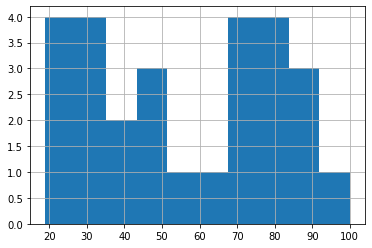

In [84]:
data_s['Score0.3'].hist()

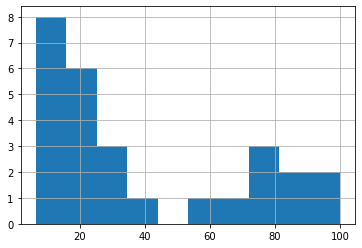

In [85]:
data_s['Score0.5'].hist()

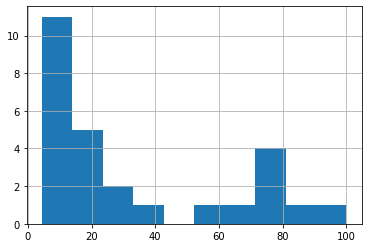

In [86]:
data_s['Score0.2'].hist()

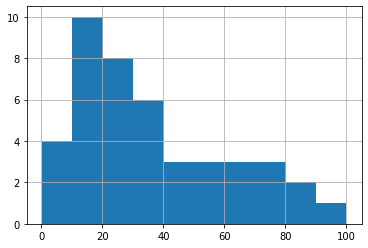

In [87]:
data_t['Score0.3'].hist()

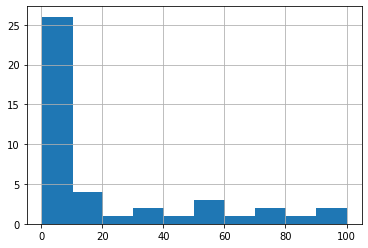

In [88]:
data_t['Score0.5'].hist()

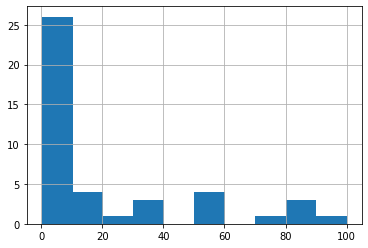

In [89]:
data_t['Score0.2'].hist()